In [17]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt 
import numpy as np 

Now loading the mnist dataset available in tensorflow.

In [5]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
print(X_train.shape)

(60000, 28, 28)


Text(0.5, 1.0, 'Label: 5')

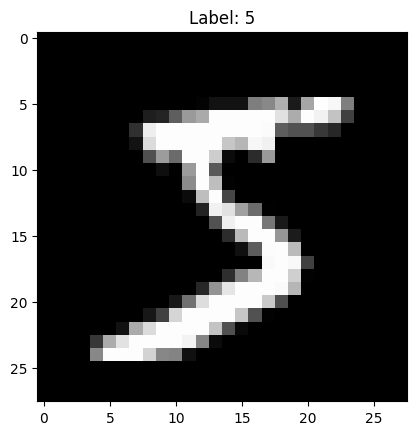

In [10]:
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")

Now lets normalize our input image to the range [0,1]

In [11]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Lets one hot encode the output y

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
model = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(2, activation='relu'),
        Dense(2, activation= 'relu'),
        Dense(10, activation='softmax')
    ]
)

C:\Users\Yogendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,606 (6.27 KB)

 Trainable params: 1,606 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6069 - loss: 1.1871 - val_accuracy: 0.6233 - val_loss: 1.1438
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6286 - loss: 1.1525 - val_accuracy: 0.6407 - val_loss: 1.1187
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6387 - loss: 1.1309 - val_accuracy: 0.6452 - val_loss: 1.0987
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6466 - loss: 1.1142 - val_accuracy: 0.6520 - val_loss: 1.0807
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6543 - loss: 1.0920 - val_accuracy: 0.6644 - val_loss: 1.0606
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6625 - loss: 1.0800 - val_accuracy: 0.6697 - val_loss: 1.0505
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6696 - loss: 1.0577 - val_accuracy: 0.6745 - val_loss: 1.0325
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6723 - loss: 1

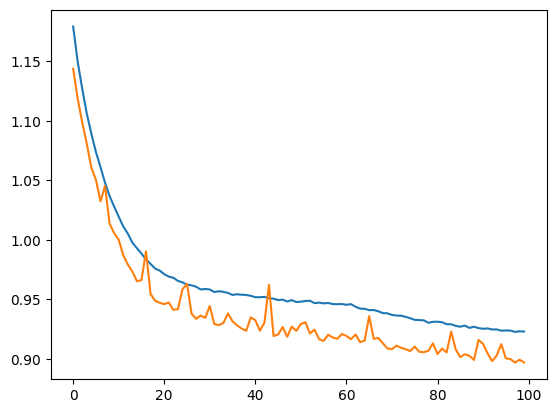

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

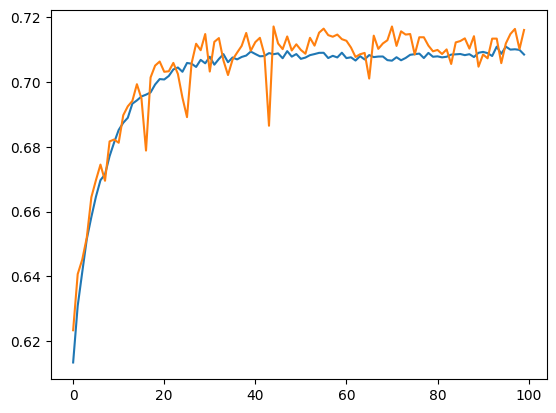

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [38]:
print(y_prob.shape)
print(y_pred.shape)

(10000, 10)
(10000,)


In [46]:
Y_test = y_test.argmax(axis=1)  #y_test is in encoded form so converting it into actual number denoted by Y_test
for i in range(10000):
    print(f"({Y_test[i]},{y_pred[i]} )")

(7,7 )
(2,2 )
(1,1 )
(0,0 )
(4,4 )
(1,1 )
(4,4 )
(9,4 )
(5,1 )
(9,9 )
(0,0 )
(6,6 )
(9,9 )
(0,0 )
(1,1 )
(5,5 )
(9,9 )
(7,7 )
(3,2 )
(4,4 )
(9,9 )
(6,6 )
(6,6 )
(5,5 )
(4,4 )
(0,0 )
(7,7 )
(4,4 )
(0,0 )
(1,1 )
(3,5 )
(1,1 )
(3,3 )
(4,5 )
(7,7 )
(2,2 )
(7,7 )
(1,1 )
(2,2 )
(1,1 )
(1,1 )
(7,7 )
(4,4 )
(2,1 )
(3,3 )
(5,3 )
(1,1 )
(2,6 )
(4,4 )
(4,4 )
(6,6 )
(3,3 )
(5,8 )
(5,8 )
(6,2 )
(0,0 )
(4,4 )
(1,1 )
(9,9 )
(5,5 )
(7,7 )
(8,5 )
(9,9 )
(3,2 )
(7,7 )
(4,9 )
(6,6 )
(4,4 )
(3,3 )
(0,0 )
(7,7 )
(0,0 )
(2,2 )
(9,9 )
(1,1 )
(7,9 )
(3,8 )
(2,3 )
(9,4 )
(7,7 )
(7,7 )
(6,2 )
(2,2 )
(7,7 )
(8,4 )
(4,4 )
(7,7 )
(3,3 )
(6,6 )
(1,1 )
(3,3 )
(6,6 )
(9,4 )
(3,0 )
(1,1 )
(4,4 )
(1,4 )
(7,5 )
(6,2 )
(9,9 )
(6,6 )
(0,0 )
(5,7 )
(4,4 )
(9,9 )
(9,9 )
(2,2 )
(1,8 )
(9,9 )
(4,9 )
(8,8 )
(7,8 )
(3,3 )
(9,9 )
(7,8 )
(4,4 )
(4,4 )
(4,4 )
(9,9 )
(2,5 )
(5,5 )
(4,4 )
(7,7 )
(6,6 )
(7,9 )
(9,4 )
(0,0 )
(5,5 )
(8,5 )
(5,5 )
(6,6 )
(6,6 )
(5,3 )
(7,5 )
(8,8 )
(1,1 )
(0,0 )
(1,1 )
(6,6 )
(4,4 )
(6,6 )
(7,7 )
(3,3 )

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6847 - loss: 1.0166
Test accuracy: 0.7100
